## Recursive Feature Elimination



RandomForestRegressor(max_depth=10)
2.872060436513531,2.343331724158837,9.244240833851658,3.2342941191762016,2.4475978348339753,1.814326939811876,15.506577064086514,8.30158821895641,5.02005415372439,7.304214103500269,11.984428877678479,23.03961608013821,6.722049415330672,0.16562019823898144,

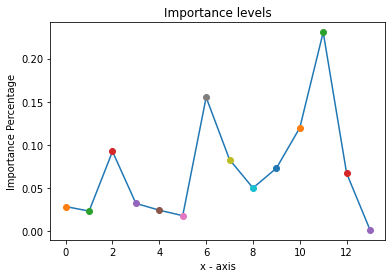

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
1.604995890234212,0.2630989141835808,6.776140261708502,7.184980879651161,2.3435483553251255,0.2462417947776836,7.946168322208163,7.113264458214999,8.126555362738978,1.5596090750421918,19.732426430113506,34.020931370798216,3.0817653401755223,0.0002735448281746483,

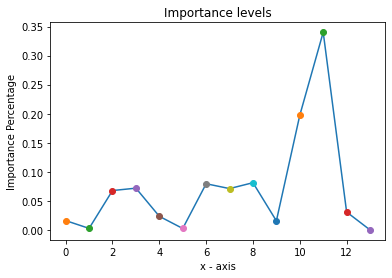

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
2.7342322548707174,0.14229742860099076,5.207523492705721,5.08546950591411,2.855666405875253,0.18124039886074972,21.99362521976665,6.101488481925454,5.494490876749715,2.695942898594982,21.419352433463075,24.178254894059886,1.7016151288311476,0.20880057978155273,

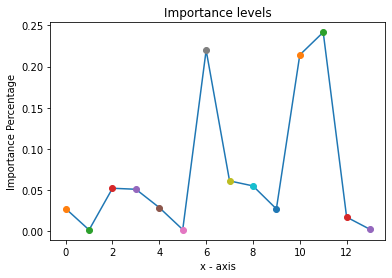

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
5.363477000563245,3.634732405779066,4.527541429104247,5.483291975431813,2.1768495517168183,3.656643476159427,17.644194362164225,9.63417627260337,6.487560613137543,8.51842331483842,9.581428472662099,12.43359108366518,8.694689925422537,2.1634001167520274,

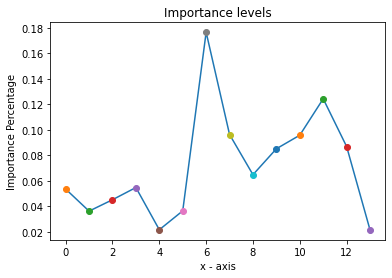

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('iiit.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1

## Graph comparing all algorithms



Randomforest
2.872060436513531,2.343331724158837,9.244240833851658,3.2342941191762016,2.4475978348339753,1.814326939811876,15.506577064086514,8.30158821895641,5.02005415372439,7.304214103500269,11.984428877678479,23.03961608013821,6.722049415330672,0.16562019823898144,

DecisionTree
1.604995890234212,0.2630989141835808,6.776140261708502,7.184980879651161,2.3435483553251255,0.2462417947776836,7.946168322208163,7.113264458214999,8.126555362738978,1.5596090750421918,19.732426430113506,34.020931370798216,3.0817653401755223,0.0002735448281746483,

Gradientboost
2.7342322548707174,0.14229742860099076,5.207523492705721,5.08546950591411,2.855666405875253,0.18124039886074972,21.99362521976665,6.101488481925454,5.494490876749715,2.695942898594982,21.419352433463075,24.178254894059886,1.7016151288311476,0.20880057978155273,

Extratree
5.363477000563245,3.634732405779066,4.527541429104247,5.483291975431813,2.1768495517168183,3.656643476159427,17.644194362164225,9.63417627260337,6.487560613137543

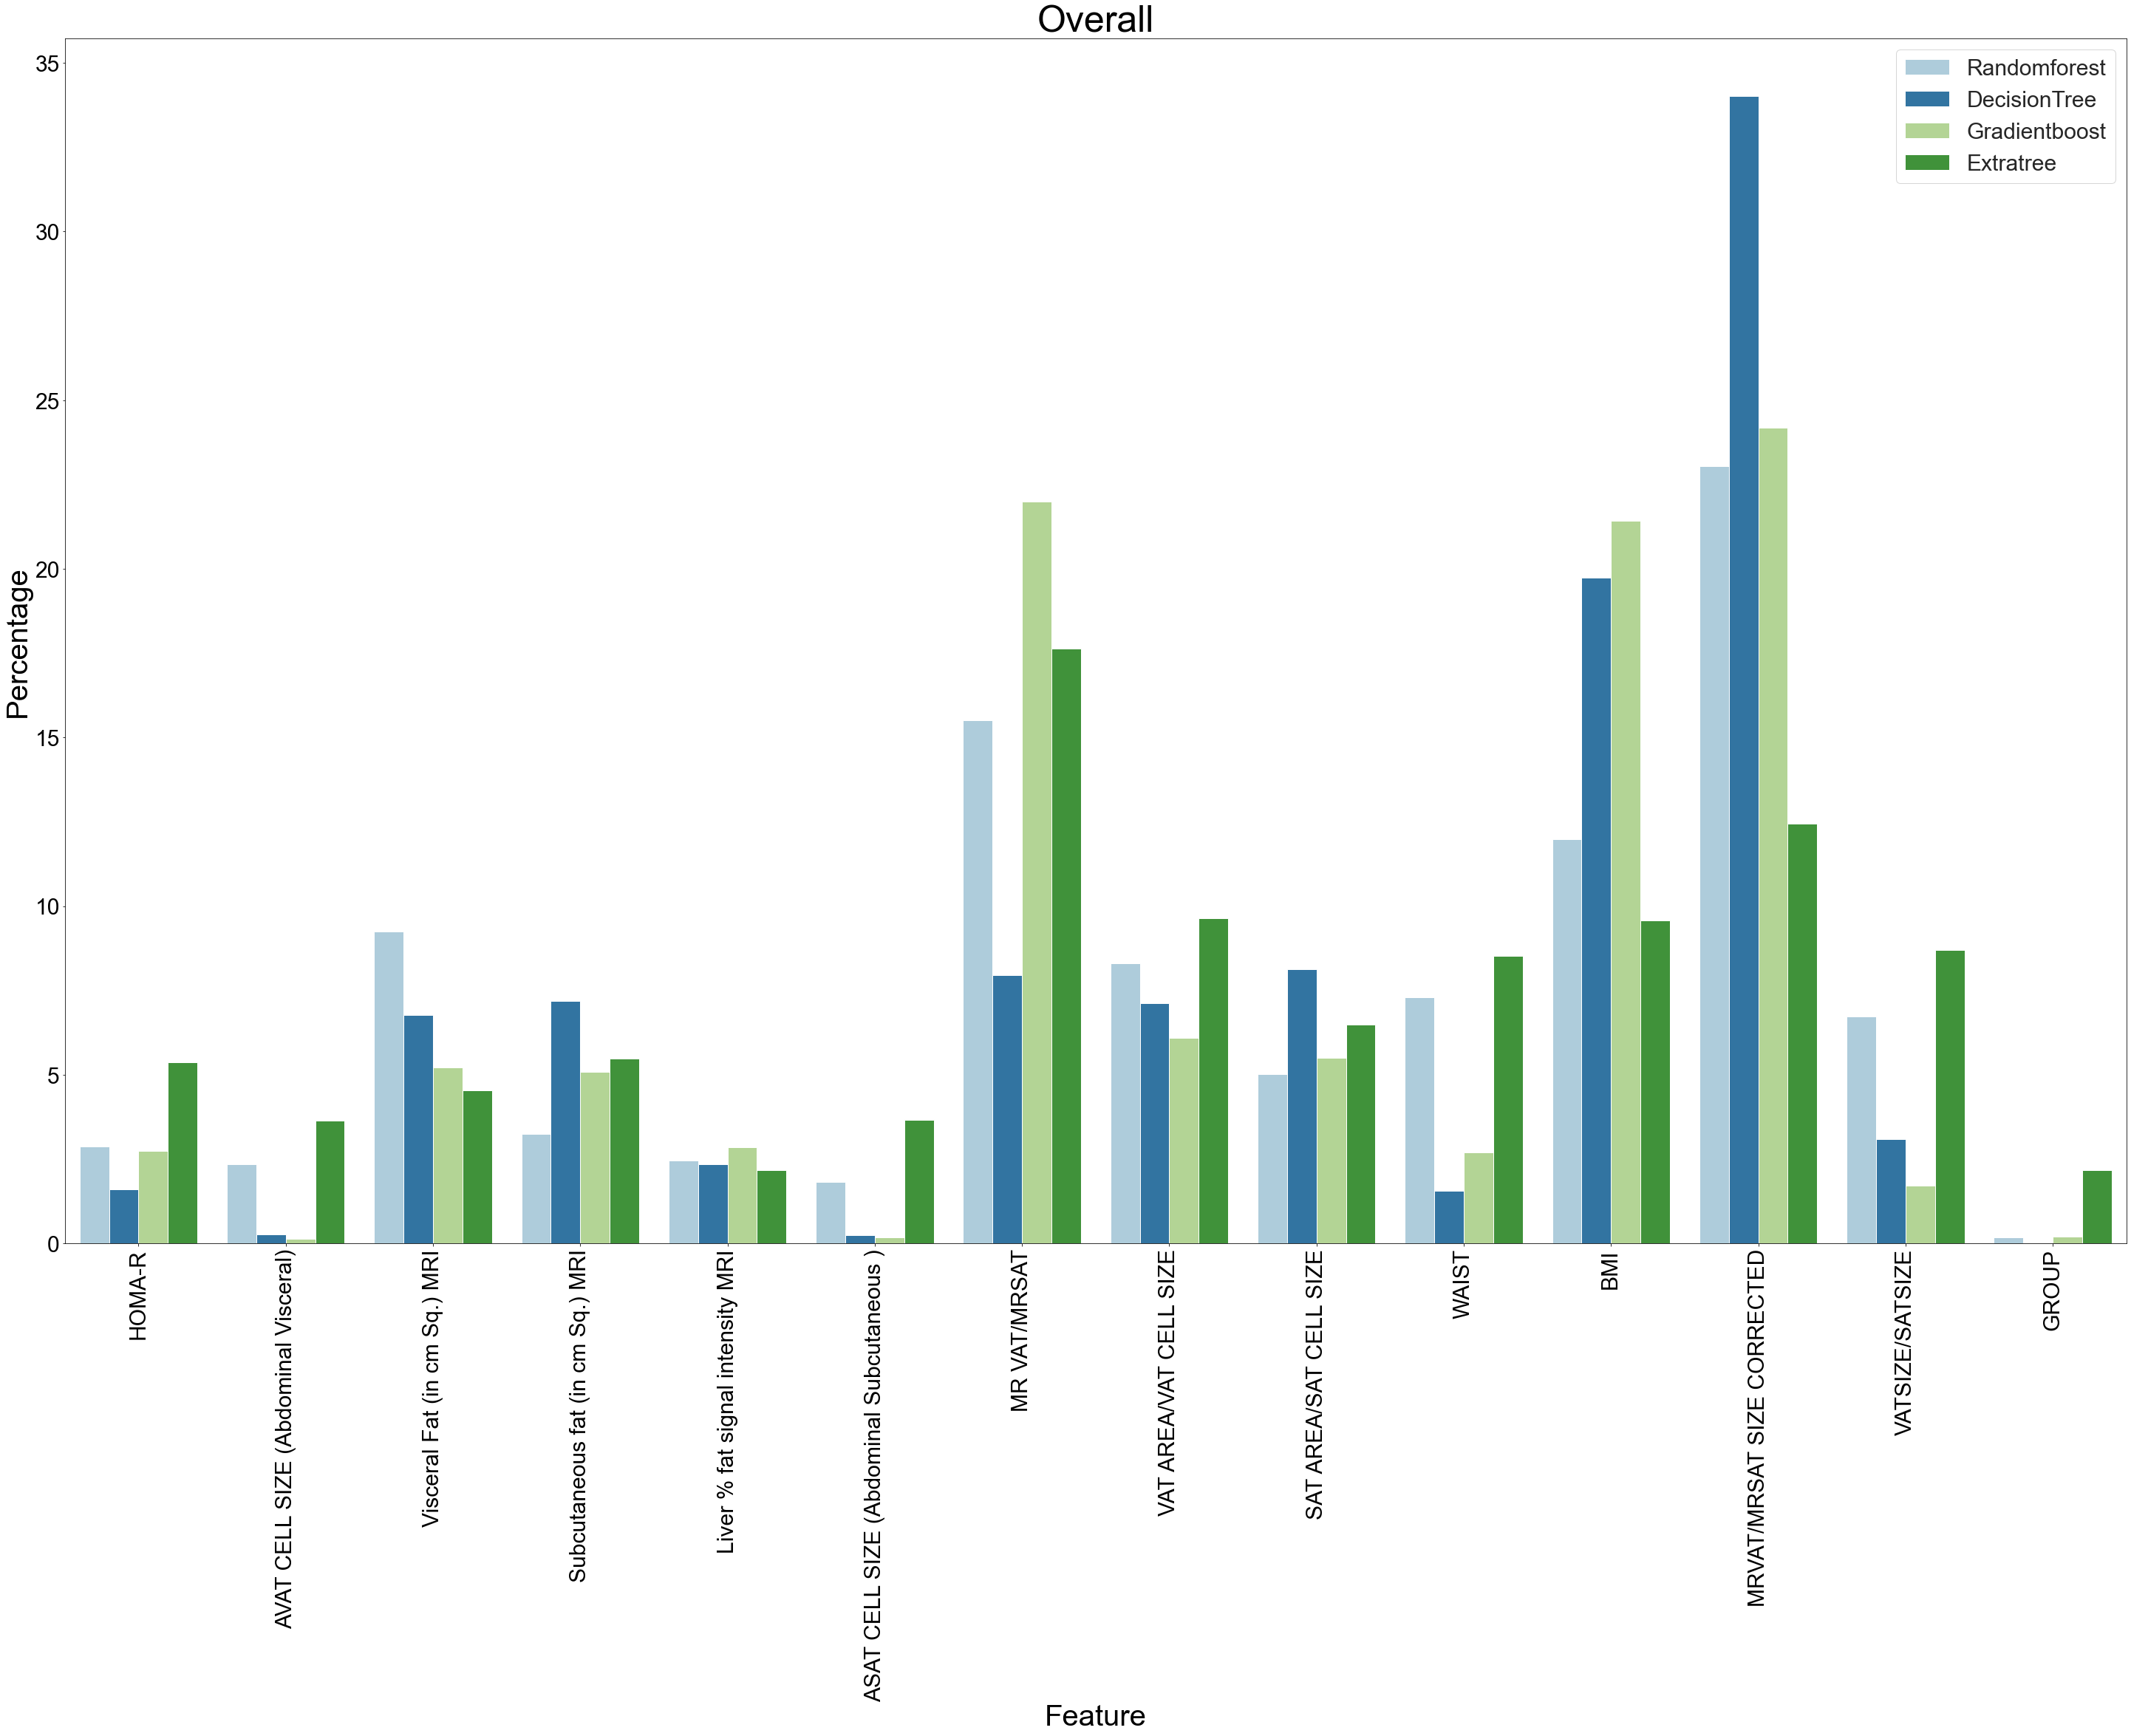

In [2]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Overall",fontsize=50)
ax.legend(fontsize = 30)



RandomForestRegressor(max_depth=10)
21.795003852509183,11.930069272272979,6.0529856794255235,2.515264862440576,6.240398051544034,3.986954479209095,4.677657248026812,4.314450667093412,13.343111876670308,2.363413646138011,10.319010863847646,4.726798904843673,6.999602867028042,0.7352777289506739,

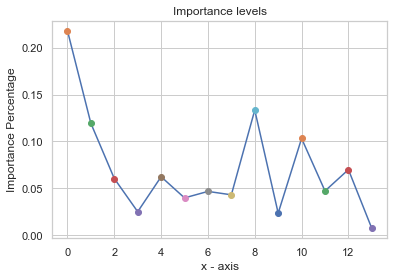

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
26.696224993188757,30.581899890355423,0.9719213111353887,0.8414582634005848,4.623776358833832,3.7251417144305283,5.926288597917181,0.7588977977293321,7.8607320437296995,3.588483620777864,0.7017751559927576,5.443663446959484,8.180913687916963,0.09882311763215808,

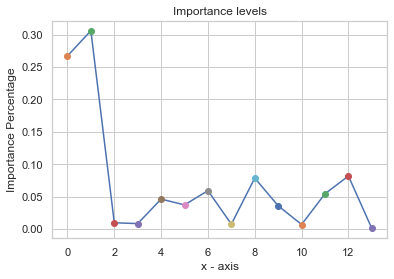

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
26.34778530940432,30.805744364977606,0.6527793946294616,2.7099228721043236,3.146164007573122,3.023483787672652,5.579794724503833,0.5588809846394766,7.944016686181113,3.5426781084749184,2.0350616021252845,5.642503572238281,7.704430696218948,0.3067538892566792,

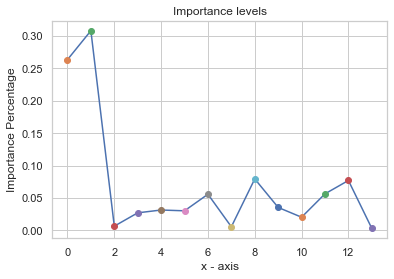

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
14.74223803951543,6.93218743481302,4.703684812085589,2.6741025698348073,3.383693663465958,4.618923972794473,5.5136869328776354,0.7080234697323724,7.844141554959562,4.774951511450057,12.552331001859795,3.9815366874488083,16.688317398905127,10.882180950257348,

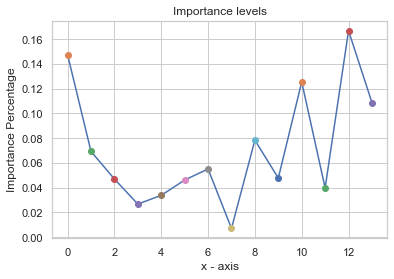

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('g1.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1



Randomforest
21.795003852509183,11.930069272272979,6.0529856794255235,2.515264862440576,6.240398051544034,3.986954479209095,4.677657248026812,4.314450667093412,13.343111876670308,2.363413646138011,10.319010863847646,4.726798904843673,6.999602867028042,0.7352777289506739,

DecisionTree
26.696224993188757,30.581899890355423,0.9719213111353887,0.8414582634005848,4.623776358833832,3.7251417144305283,5.926288597917181,0.7588977977293321,7.8607320437296995,3.588483620777864,0.7017751559927576,5.443663446959484,8.180913687916963,0.09882311763215808,

Gradientboost
26.34778530940432,30.805744364977606,0.6527793946294616,2.7099228721043236,3.146164007573122,3.023483787672652,5.579794724503833,0.5588809846394766,7.944016686181113,3.5426781084749184,2.0350616021252845,5.642503572238281,7.704430696218948,0.3067538892566792,

Extratree
14.74223803951543,6.93218743481302,4.703684812085589,2.6741025698348073,3.383693663465958,4.618923972794473,5.5136869328776354,0.7080234697323724,7.844141554959562

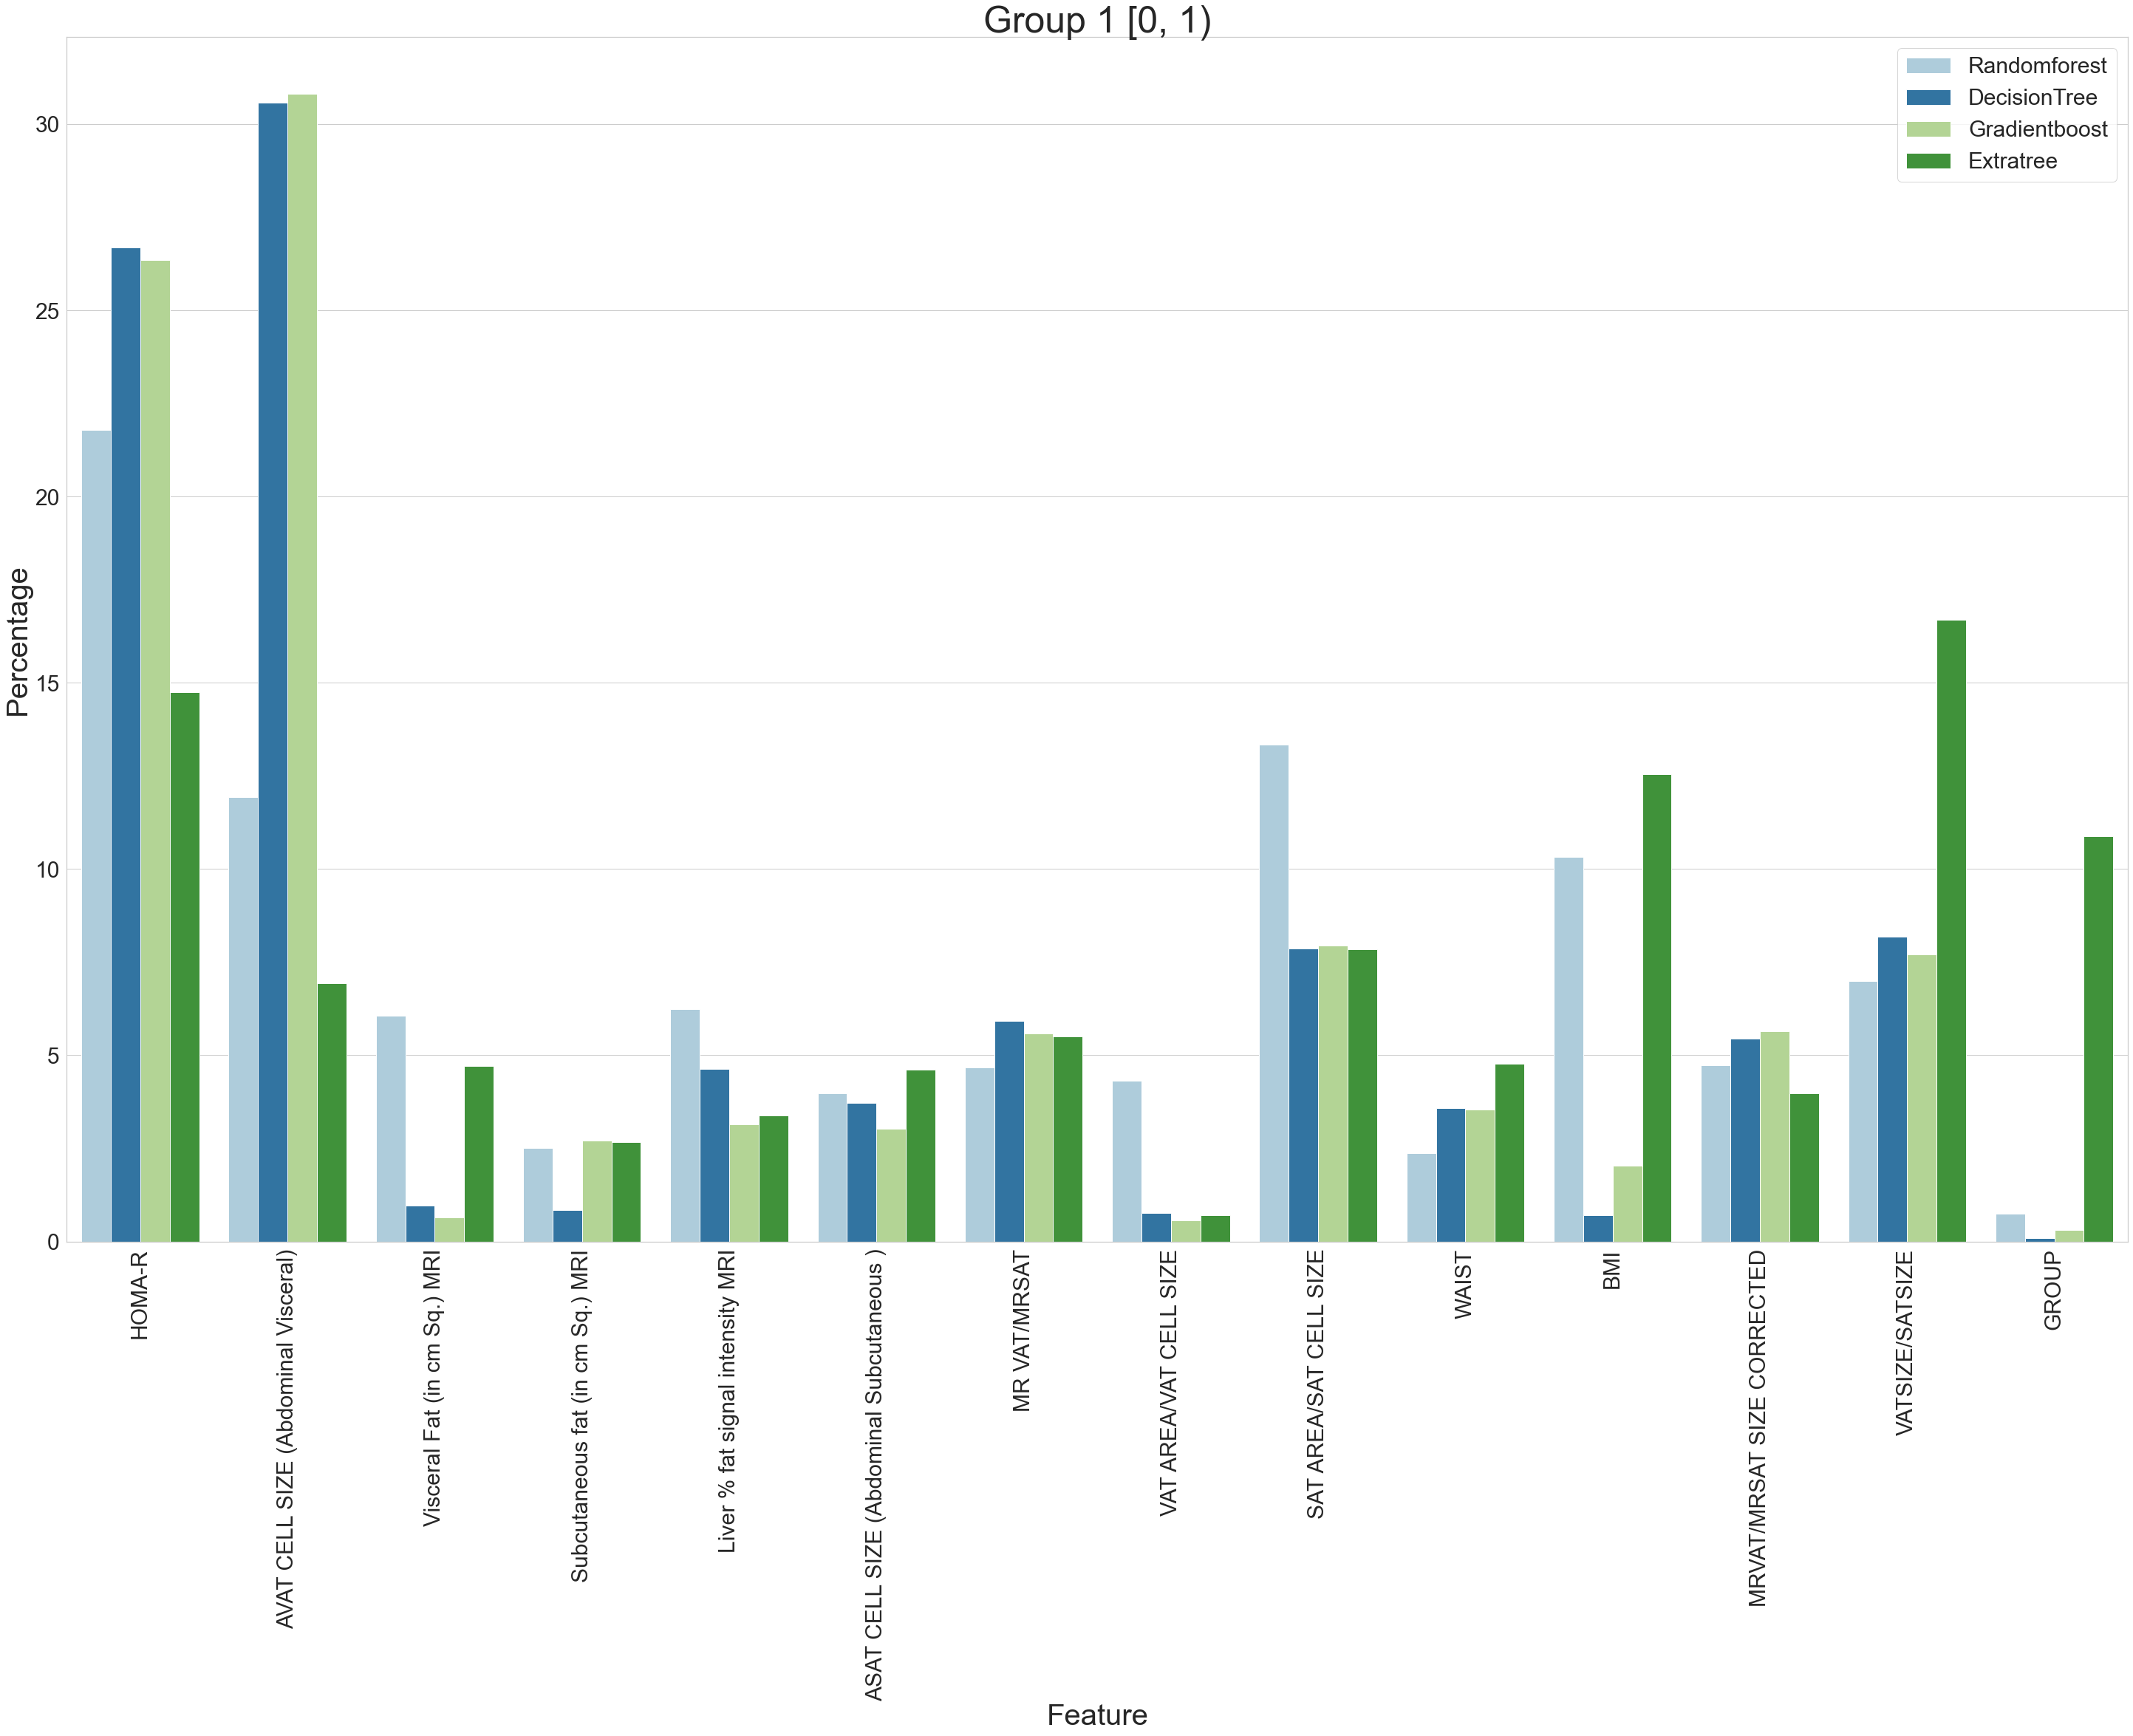

In [6]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Group 1 [0, 1)",fontsize=50)
ax.legend(fontsize = 30)



RandomForestRegressor(max_depth=10)
2.3677106839265774,2.535165208452174,2.688232303287654,2.362208745072256,5.745270824299892,1.6551617837486765,2.4640520357666658,5.601567169280369,59.29649775826981,1.0751692061508007,1.1658734829360338,2.116189384449595,10.752939536559852,0.1739618777996013,

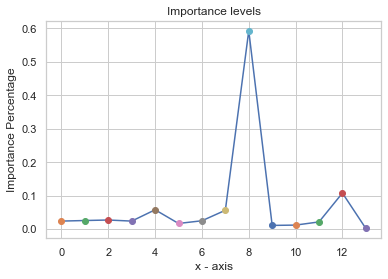

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
0.3533499995997579,0.4424279856857872,0.3571186362059765,0.31877672633949167,2.447278941015248,0.29188962497461785,0.03546095469981294,0.23849420838120486,82.87134107055456,0.06285523427504686,0.16278104495025827,0.36153628694784906,12.038477152738391,0.018212133631671564,

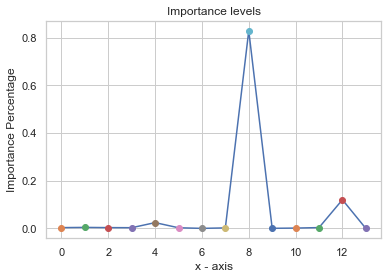

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
0.26365225237927054,0.8908812296695996,0.25071898649972674,0.14551423652079928,1.8089545647843888,0.14082752969237552,0.13462299464689104,0.2585182185089319,83.83827712672587,0.1338313251591481,0.3909642077729735,0.35631059025570083,11.35741051002206,0.02951622736220348,

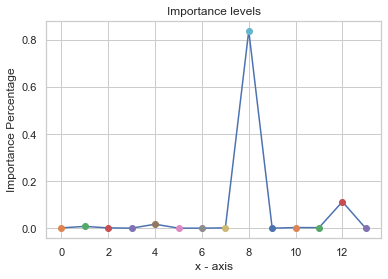

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
1.540798666741724,12.616497954077666,2.3351363794640614,5.280028162547578,9.860715726220578,4.296155232964786,3.2903280627089053,6.84493149395631,41.70918818234467,1.298836061295056,0.8952636980520998,3.5576029687210617,6.251194361116386,0.2233230497891178,

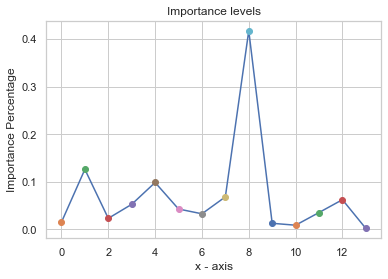

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [16]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('g2.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1



Randomforest
2.3677106839265774,2.535165208452174,2.688232303287654,2.362208745072256,5.745270824299892,1.6551617837486765,2.4640520357666658,5.601567169280369,59.29649775826981,1.0751692061508007,1.1658734829360338,2.116189384449595,10.752939536559852,0.1739618777996013,

DecisionTree
0.3533499995997579,0.4424279856857872,0.3571186362059765,0.31877672633949167,2.447278941015248,0.29188962497461785,0.03546095469981294,0.23849420838120486,82.87134107055456,0.06285523427504686,0.16278104495025827,0.36153628694784906,12.038477152738391,0.018212133631671564,

Gradientboost
0.26365225237927054,0.8908812296695996,0.25071898649972674,0.14551423652079928,1.8089545647843888,0.14082752969237552,0.13462299464689104,0.2585182185089319,83.83827712672587,0.1338313251591481,0.3909642077729735,0.35631059025570083,11.35741051002206,0.02951622736220348,

Extratree
1.540798666741724,12.616497954077666,2.3351363794640614,5.280028162547578,9.860715726220578,4.296155232964786,3.2903280627089053,6.84493149

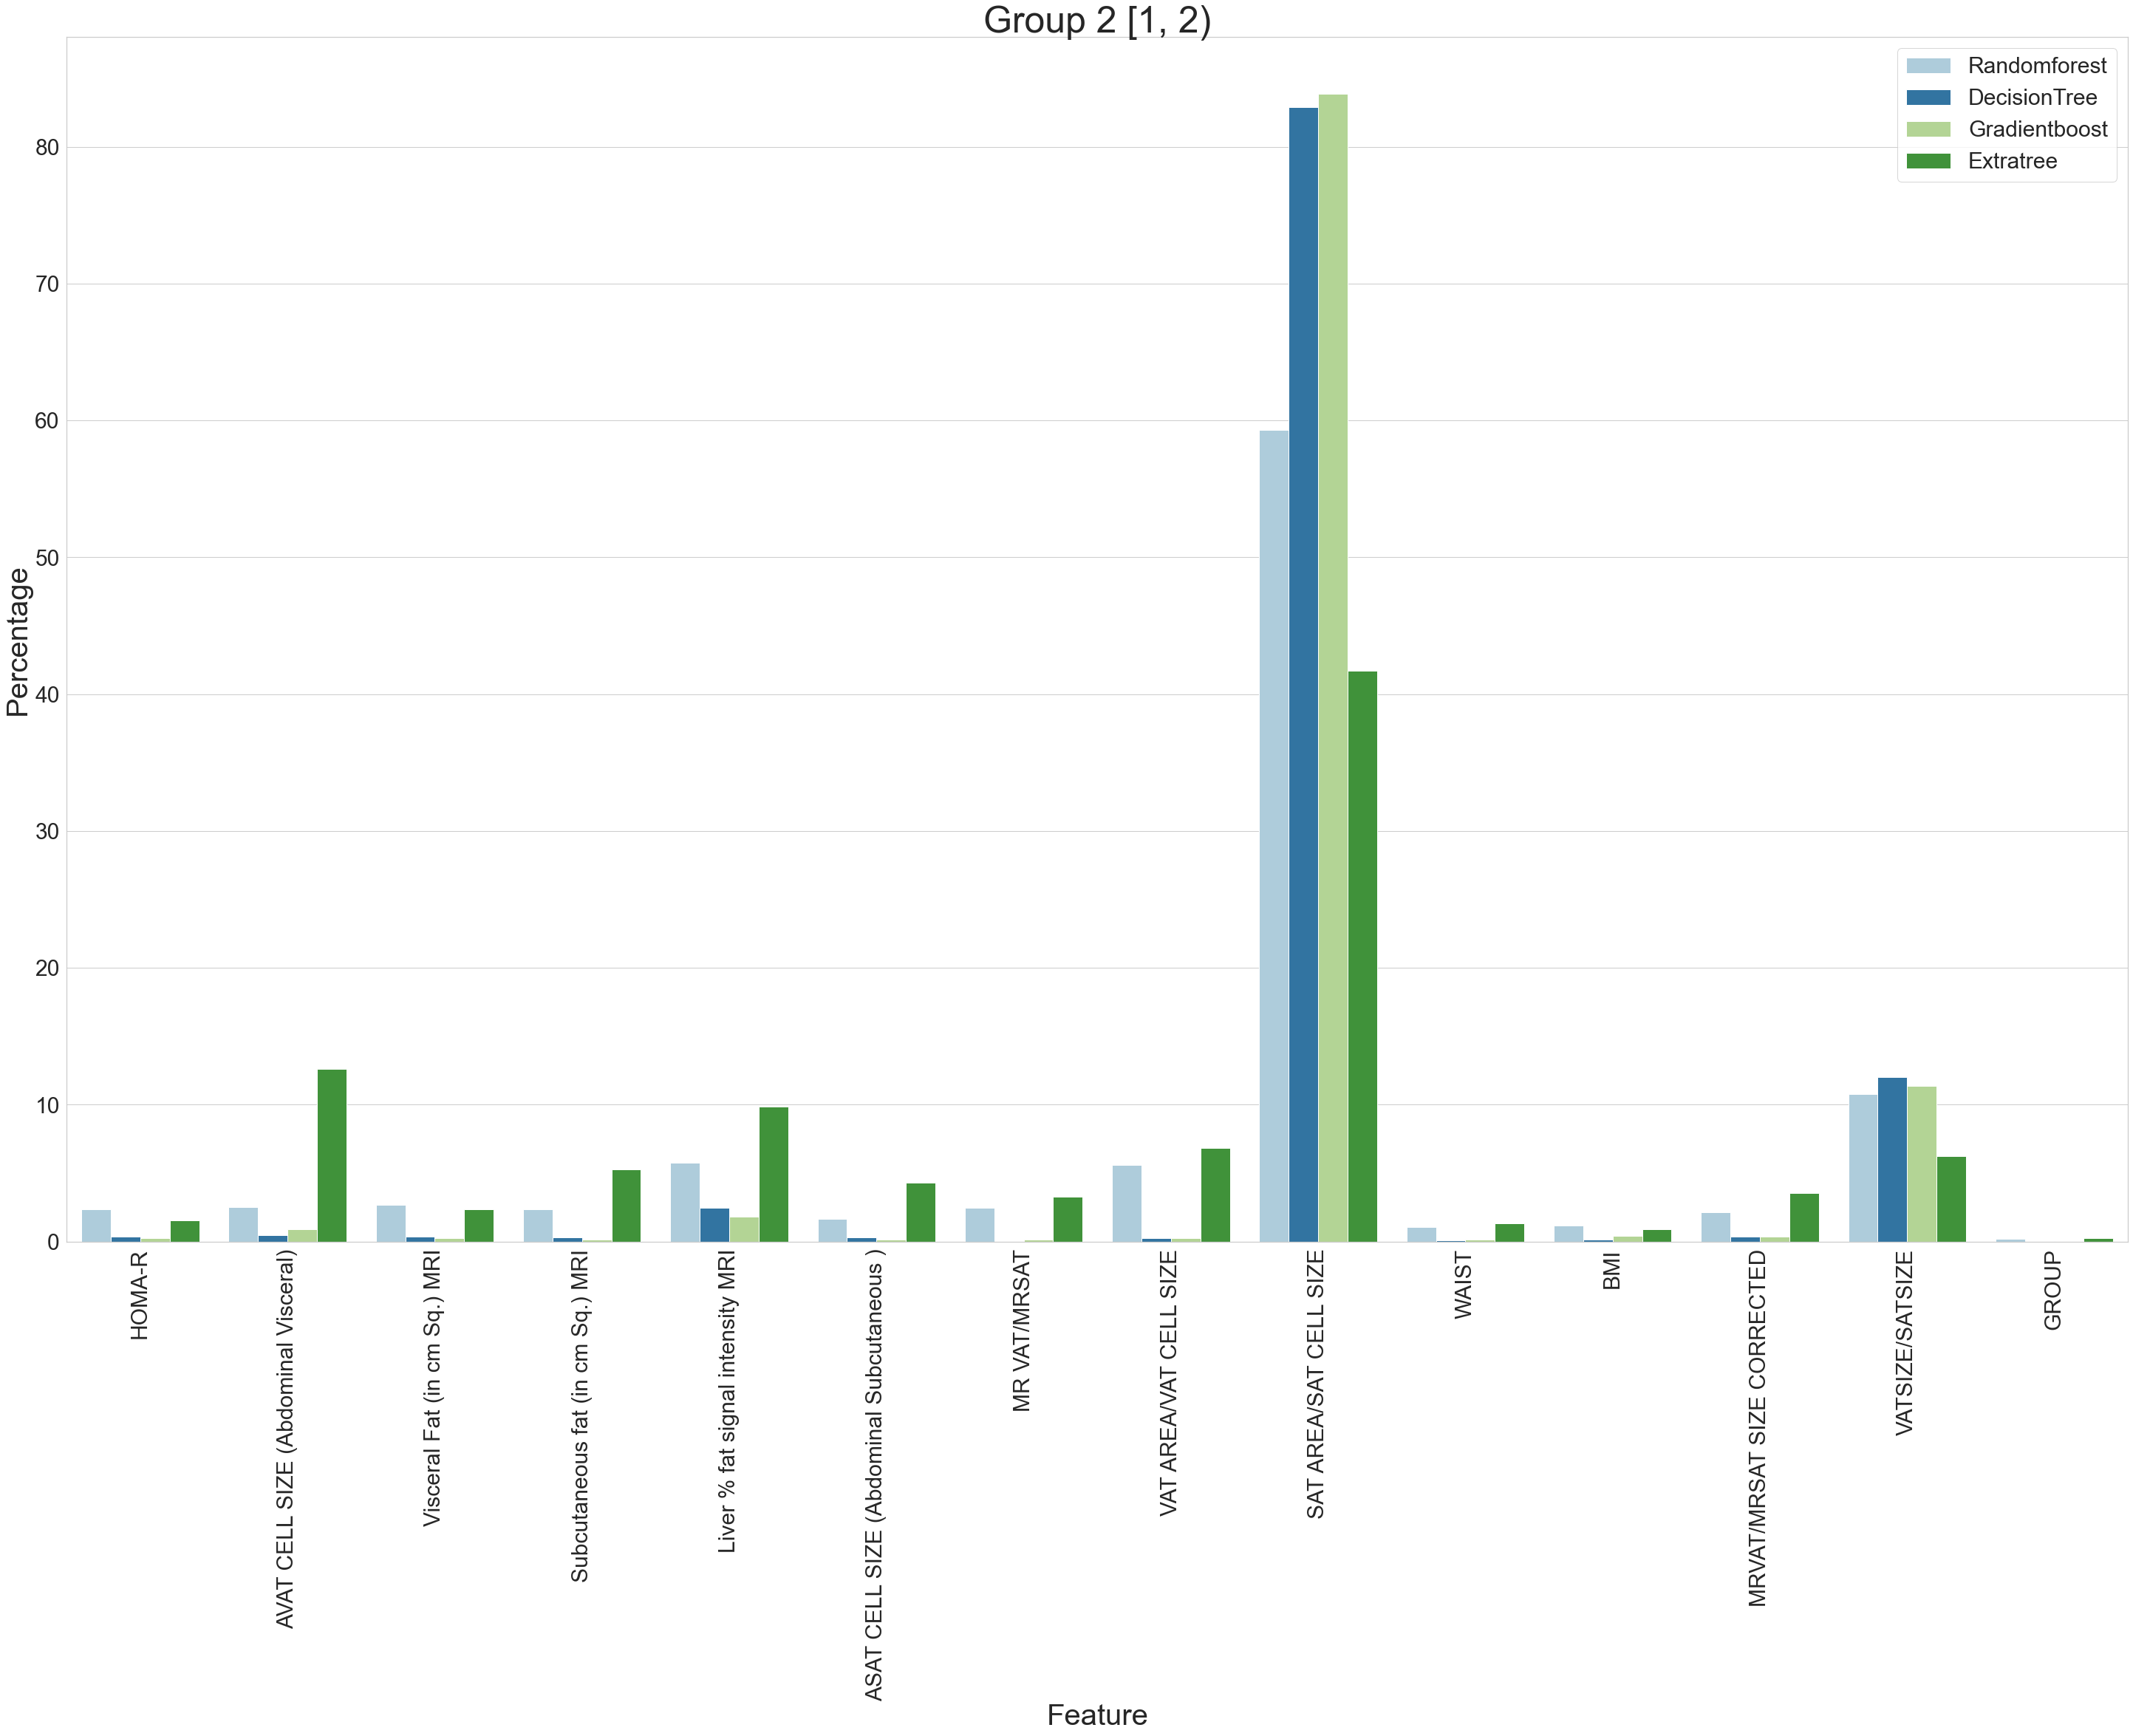

In [17]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Group 2 [1, 2)",fontsize=50)
ax.legend(fontsize = 30)



RandomForestRegressor(max_depth=10)
2.4198995413550235,2.275471907887135,18.88734016048926,4.460714475458367,3.000694144542609,6.654158940805245,8.056336942617827,19.49091237430163,4.308910037832679,6.574312984773546,3.712373494487952,16.401565085956417,2.822880469758254,0.9344294397340352,

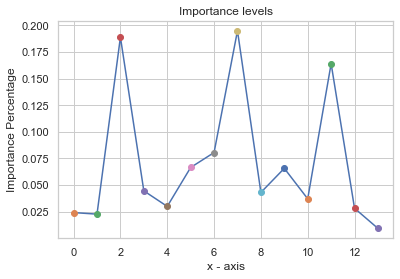

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
0.4245058900502767,0.2868108487937212,31.462303655274965,0.5799607916408513,9.77075882114537,0.4172211754183981,2.5170858065328794,36.062349974908464,10.532815252451394,2.289762626647956,2.552385776252271,2.638078073113117,0.40031165905460786,0.06564964871578484,

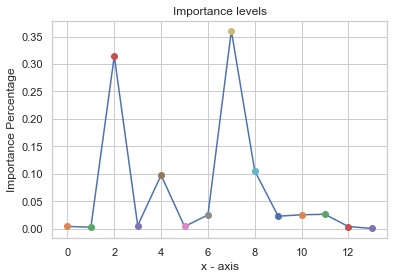

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
0.37144012602615045,0.39325651471723677,33.505359496706724,0.8109832015459966,5.42246193338575,0.4585225749321395,5.963508911399153,34.02589702177556,6.000578970172558,0.9687307395731055,5.681281494580215,5.412240373855272,0.9177676923716849,0.06797094895847434,

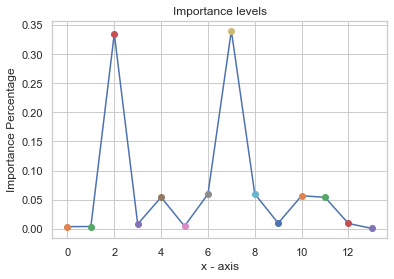

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
3.154381616674197,3.1290230529864274,28.908264693257774,4.232135168250293,3.5596024614162975,4.325041329345099,9.081288598549397,15.800522906104666,4.736125576175406,7.2478975910590995,5.702522883971379,6.155787281779583,2.506276358900417,1.461130481529994,

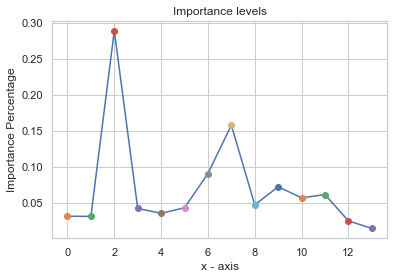

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [18]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('g3.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1



Randomforest
2.4198995413550235,2.275471907887135,18.88734016048926,4.460714475458367,3.000694144542609,6.654158940805245,8.056336942617827,19.49091237430163,4.308910037832679,6.574312984773546,3.712373494487952,16.401565085956417,2.822880469758254,0.9344294397340352,

DecisionTree
0.4245058900502767,0.2868108487937212,31.462303655274965,0.5799607916408513,9.77075882114537,0.4172211754183981,2.5170858065328794,36.062349974908464,10.532815252451394,2.289762626647956,2.552385776252271,2.638078073113117,0.40031165905460786,0.06564964871578484,

Gradientboost
0.37144012602615045,0.39325651471723677,33.505359496706724,0.8109832015459966,5.42246193338575,0.4585225749321395,5.963508911399153,34.02589702177556,6.000578970172558,0.9687307395731055,5.681281494580215,5.412240373855272,0.9177676923716849,0.06797094895847434,

Extratree
3.154381616674197,3.1290230529864274,28.908264693257774,4.232135168250293,3.5596024614162975,4.325041329345099,9.081288598549397,15.800522906104666,4.736125576175

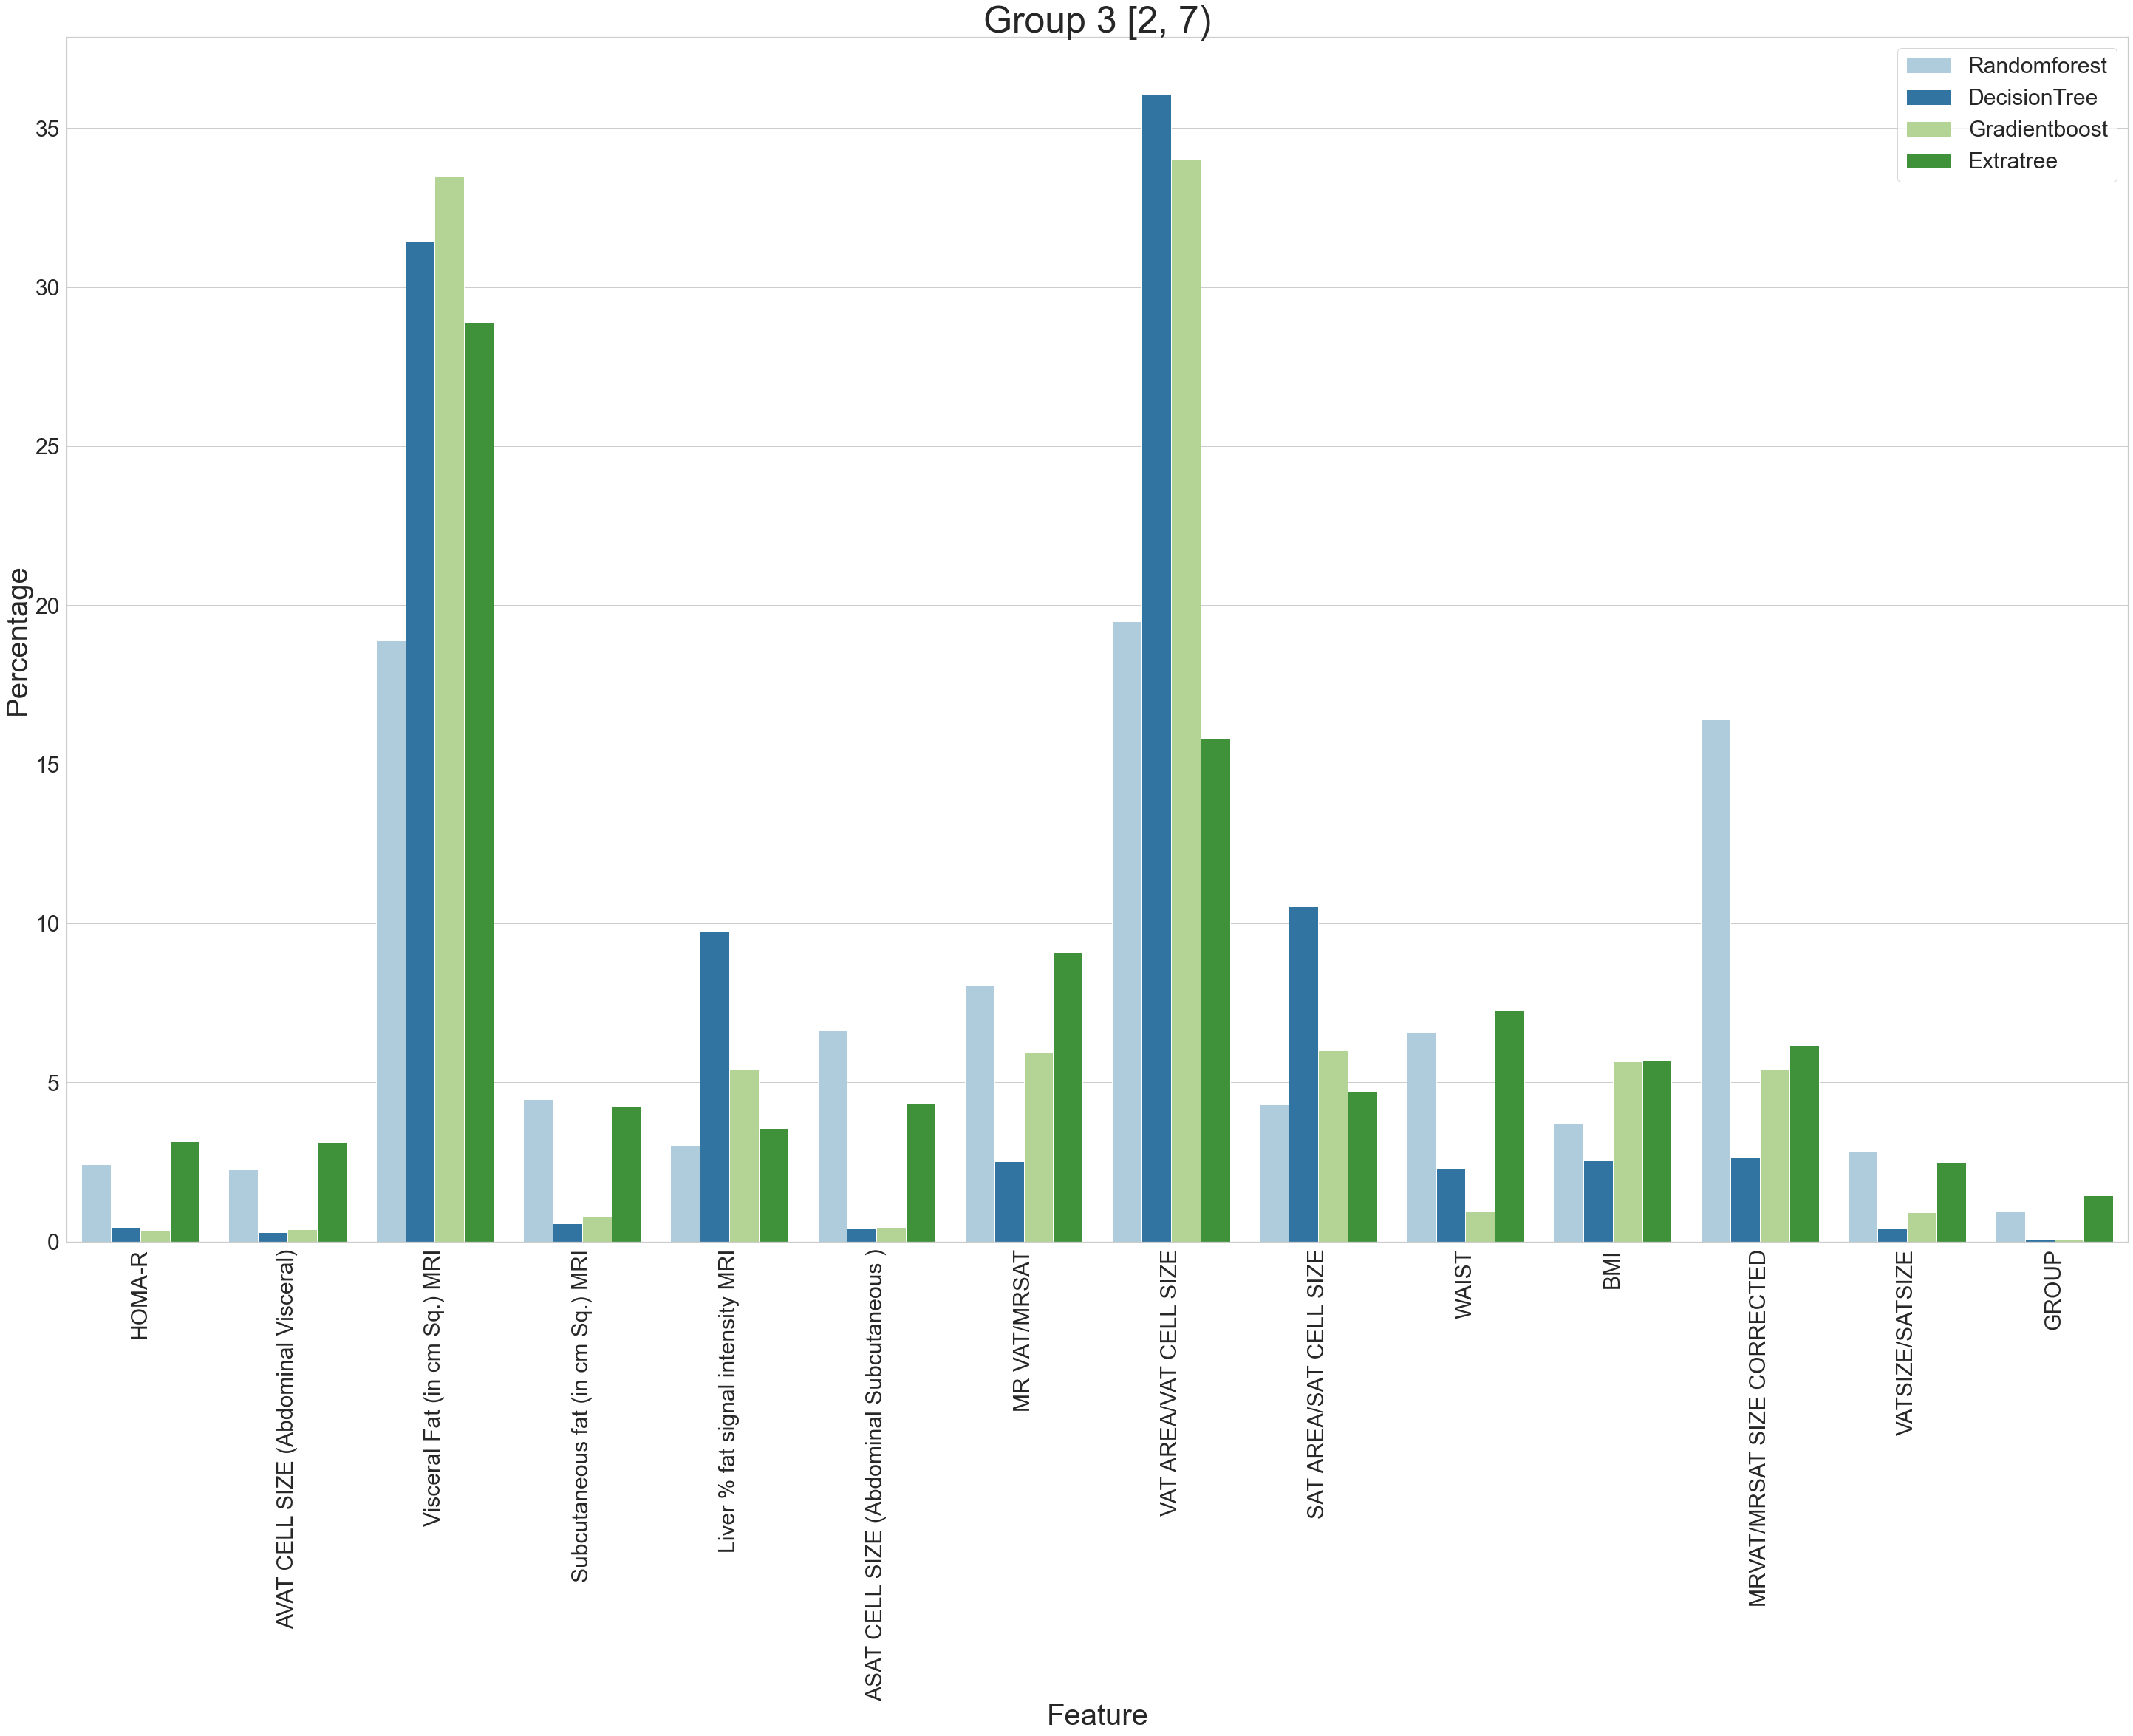

In [19]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Group 3 [2, 7)",fontsize=50)
ax.legend(fontsize = 30)



RandomForestRegressor(max_depth=10)
2.8326688436094374,2.981345408382673,37.26559966297689,2.2731829381854496,8.995285975634225,8.354908312099505,8.480527918171783,4.4119947463714535,3.6040682823188903,2.4292274810143772,8.346190271716141,2.045650349757788,7.767299694184235,0.21205011557713763,

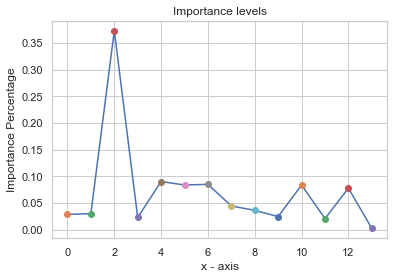

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
0.570829871796485,0.7413409800914756,52.95025010522056,0.6615651776199952,0.49291193899542807,12.145453321163355,28.829126095294615,0.518941423233631,0.6762867621721774,0.5162697153350431,0.41858099793429326,0.7904222074605962,0.566772148686558,0.12124925499581617,

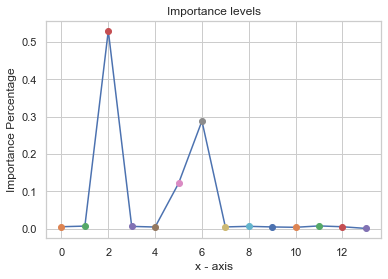

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
0.6268887257421282,0.6976583177563123,52.44185128517033,0.7013946556940691,0.6353466633555739,21.470618819821713,18.830377213390395,0.8981006842444033,0.6681659641222235,0.6245393089114603,0.7746417246398174,0.6708189481628548,0.8804366842010737,0.0791610047876754,

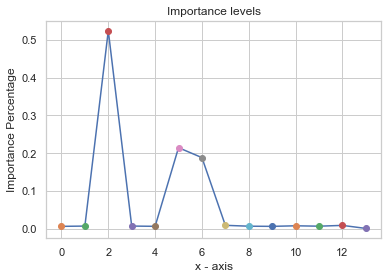

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
8.530601817599765,4.259343448083038,29.63457038725787,5.298646162588864,3.997065469022347,4.191292020185069,9.419431141312613,5.284360442130574,3.0387430076120063,2.2262956901693163,9.758823665374548,3.335247911902513,10.696469423241744,0.32910941351973816,

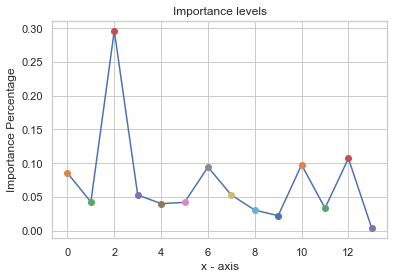

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [20]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('g4.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1



Randomforest
2.8326688436094374,2.981345408382673,37.26559966297689,2.2731829381854496,8.995285975634225,8.354908312099505,8.480527918171783,4.4119947463714535,3.6040682823188903,2.4292274810143772,8.346190271716141,2.045650349757788,7.767299694184235,0.21205011557713763,

DecisionTree
0.570829871796485,0.7413409800914756,52.95025010522056,0.6615651776199952,0.49291193899542807,12.145453321163355,28.829126095294615,0.518941423233631,0.6762867621721774,0.5162697153350431,0.41858099793429326,0.7904222074605962,0.566772148686558,0.12124925499581617,

Gradientboost
0.6268887257421282,0.6976583177563123,52.44185128517033,0.7013946556940691,0.6353466633555739,21.470618819821713,18.830377213390395,0.8981006842444033,0.6681659641222235,0.6245393089114603,0.7746417246398174,0.6708189481628548,0.8804366842010737,0.0791610047876754,

Extratree
8.530601817599765,4.259343448083038,29.63457038725787,5.298646162588864,3.997065469022347,4.191292020185069,9.419431141312613,5.284360442130574,3.0387430

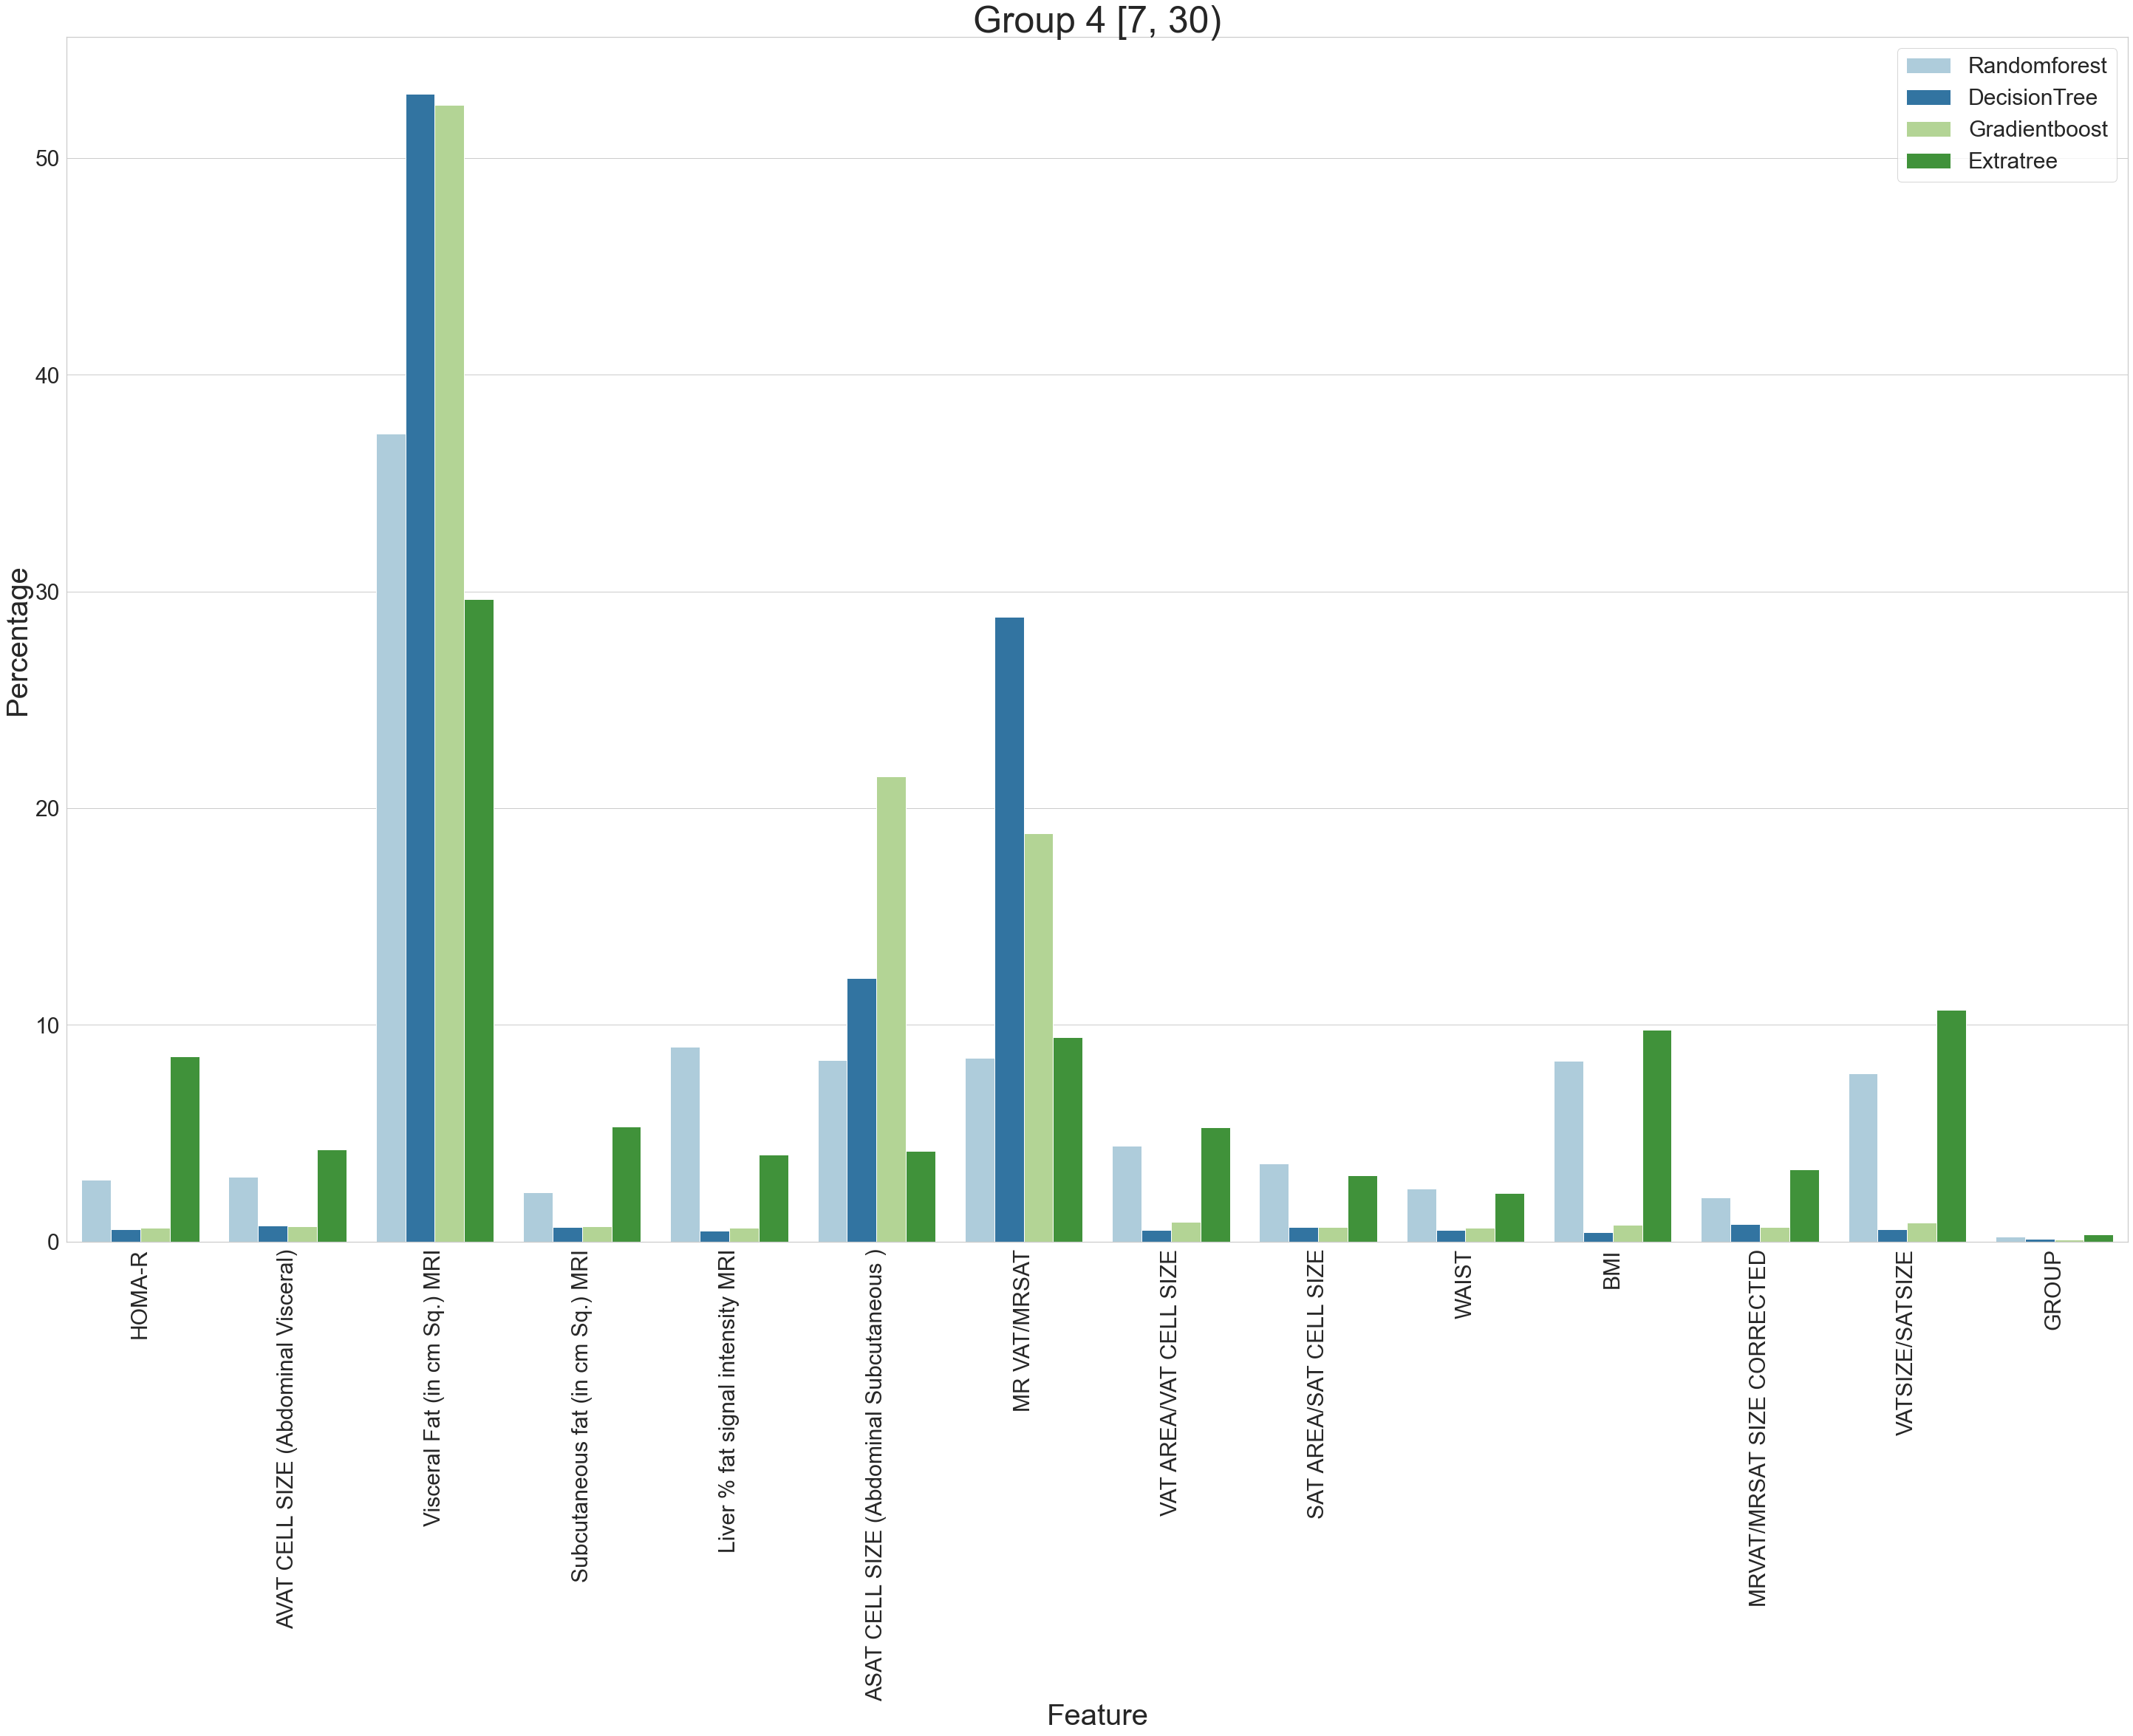

In [21]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Group 4 [7, 30)",fontsize=50)
ax.legend(fontsize = 30)



RandomForestRegressor(max_depth=10)
3.514719542235831,3.6870412476427994,21.124769242218818,4.87120686274625,5.365562200359358,4.946524467848297,4.228648543345359,18.8258540209584,7.581460032304149,9.442256493808378,4.874876281170802,7.330467583201801,3.5007700997675055,0.7058433823922702,

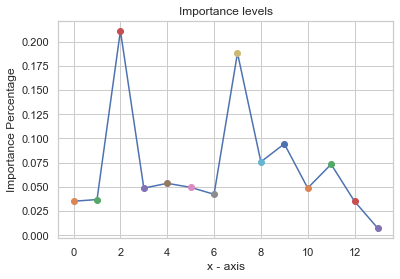

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


DecisionTreeRegressor(max_depth=100)
0.14081282666892808,0.07687392817361521,48.23944700987005,0.5783507189141658,0.880170652616211,0.11298743429034104,0.05578170412775437,45.93831986998184,0.8402376092520059,0.7004896452869234,0.6682497853463352,0.7788932381911733,0.9318096118632477,0.057575965417185404,

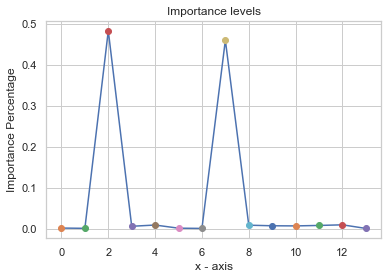

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


GradientBoostingRegressor()
0.11067996263386952,0.057003550620224115,55.03646449560693,0.42954886057221686,0.45249246737970644,0.14512217373639508,0.08610559558497805,39.13803557084442,0.5397333577410561,0.440656955235824,0.44361761535733435,2.5453746696812427,0.5135185705572068,0.061646154448546715,

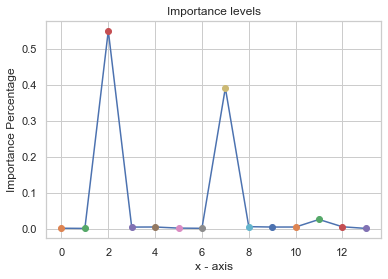

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


ExtraTreesRegressor()
0.5341885419308438,1.560889902413637,17.737952644771024,2.8683630053592473,1.7748419645393243,1.3649338916805576,7.4068807331582995,36.89023975333289,11.110485154843238,8.301873954879134,3.752704767820889,5.397322071018557,1.0406996952335132,0.2586239190188711,

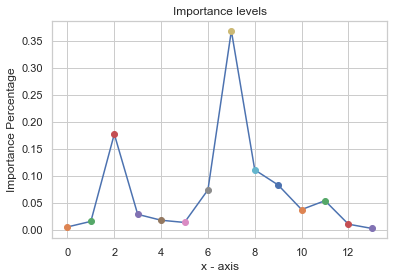

0  :  HOMA-R
1  :  AVAT CELL SIZE (Abdominal Visceral)
2  :  Visceral Fat (in cm Sq.) MRI
3  :  Subcutaneous fat (in cm Sq.) MRI
4  :  Liver % fat signal intensity MRI
5  :  ASAT CELL SIZE (Abdominal Subcutaneous )
6  :  MR VAT/MRSAT
7  :  VAT AREA/VAT CELL SIZE
8  :  SAT AREA/SAT CELL SIZE
9  :  WAIST
10  :  BMI
11  :  MRVAT/MRSAT SIZE CORRECTED
12  :  VATSIZE/SATSIZE
13  :  GROUP


In [22]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('g5.csv')
train_data.head()
features = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']
X_train       = train_data[features]
y_train       = train_data["FOLD EXPRESSION VAT BCL6"]
X_train      = X_train.fillna(X_train.median())
X_train.head()
## OVERALL ###########

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor  
from sklearn.ensemble     import ExtraTreesRegressor
from sklearn.ensemble     import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#Store all algorithms in an array
regressor = [RandomForestRegressor(n_estimators=100, max_depth=10),DecisionTreeRegressor(max_depth=100),
             GradientBoostingRegressor(),ExtraTreesRegressor()]
n_features_to_select = 14
Percentage = []
#Loop to run all algorithms at once
for i in regressor:
    print("\n")
    print(i,end="\n")
    rfe = RFE(i, n_features_to_select)
    rfe.fit(X_train, y_train)
    rfe.estimator_.feature_importances_
    feature_importance=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    t=0
    while t<500:
        rfe.fit(X_train, y_train)
        feature_importance1 = rfe.estimator_.feature_importances_ 
        feature_importance=feature_importance+(feature_importance1)
        t+=1
    for i in range(0, 14): 
        feature_importance[i]/=500
    m=0
    plt.plot(feature_importance) 
    for i in feature_importance:
        print(i*100,end=',')
        #Storing all feature importance values in an array Percentage
        Percentage.append(i*100)
        plt.plot(m,i, marker='o', linestyle='none') 
        m+=1# naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('Importance Percentage') 
    plt.title('Importance levels') 
    # function to show the plot 
    plt.show()
    l=0
    for i in features:
        print(l," : ",i)
        l+=1



Randomforest
3.514719542235831,3.6870412476427994,21.124769242218818,4.87120686274625,5.365562200359358,4.946524467848297,4.228648543345359,18.8258540209584,7.581460032304149,9.442256493808378,4.874876281170802,7.330467583201801,3.5007700997675055,0.7058433823922702,

DecisionTree
0.14081282666892808,0.07687392817361521,48.23944700987005,0.5783507189141658,0.880170652616211,0.11298743429034104,0.05578170412775437,45.93831986998184,0.8402376092520059,0.7004896452869234,0.6682497853463352,0.7788932381911733,0.9318096118632477,0.057575965417185404,

Gradientboost
0.11067996263386952,0.057003550620224115,55.03646449560693,0.42954886057221686,0.45249246737970644,0.14512217373639508,0.08610559558497805,39.13803557084442,0.5397333577410561,0.440656955235824,0.44361761535733435,2.5453746696812427,0.5135185705572068,0.061646154448546715,

Extratree
0.5341885419308438,1.560889902413637,17.737952644771024,2.8683630053592473,1.7748419645393243,1.3649338916805576,7.4068807331582995,36.89023975333

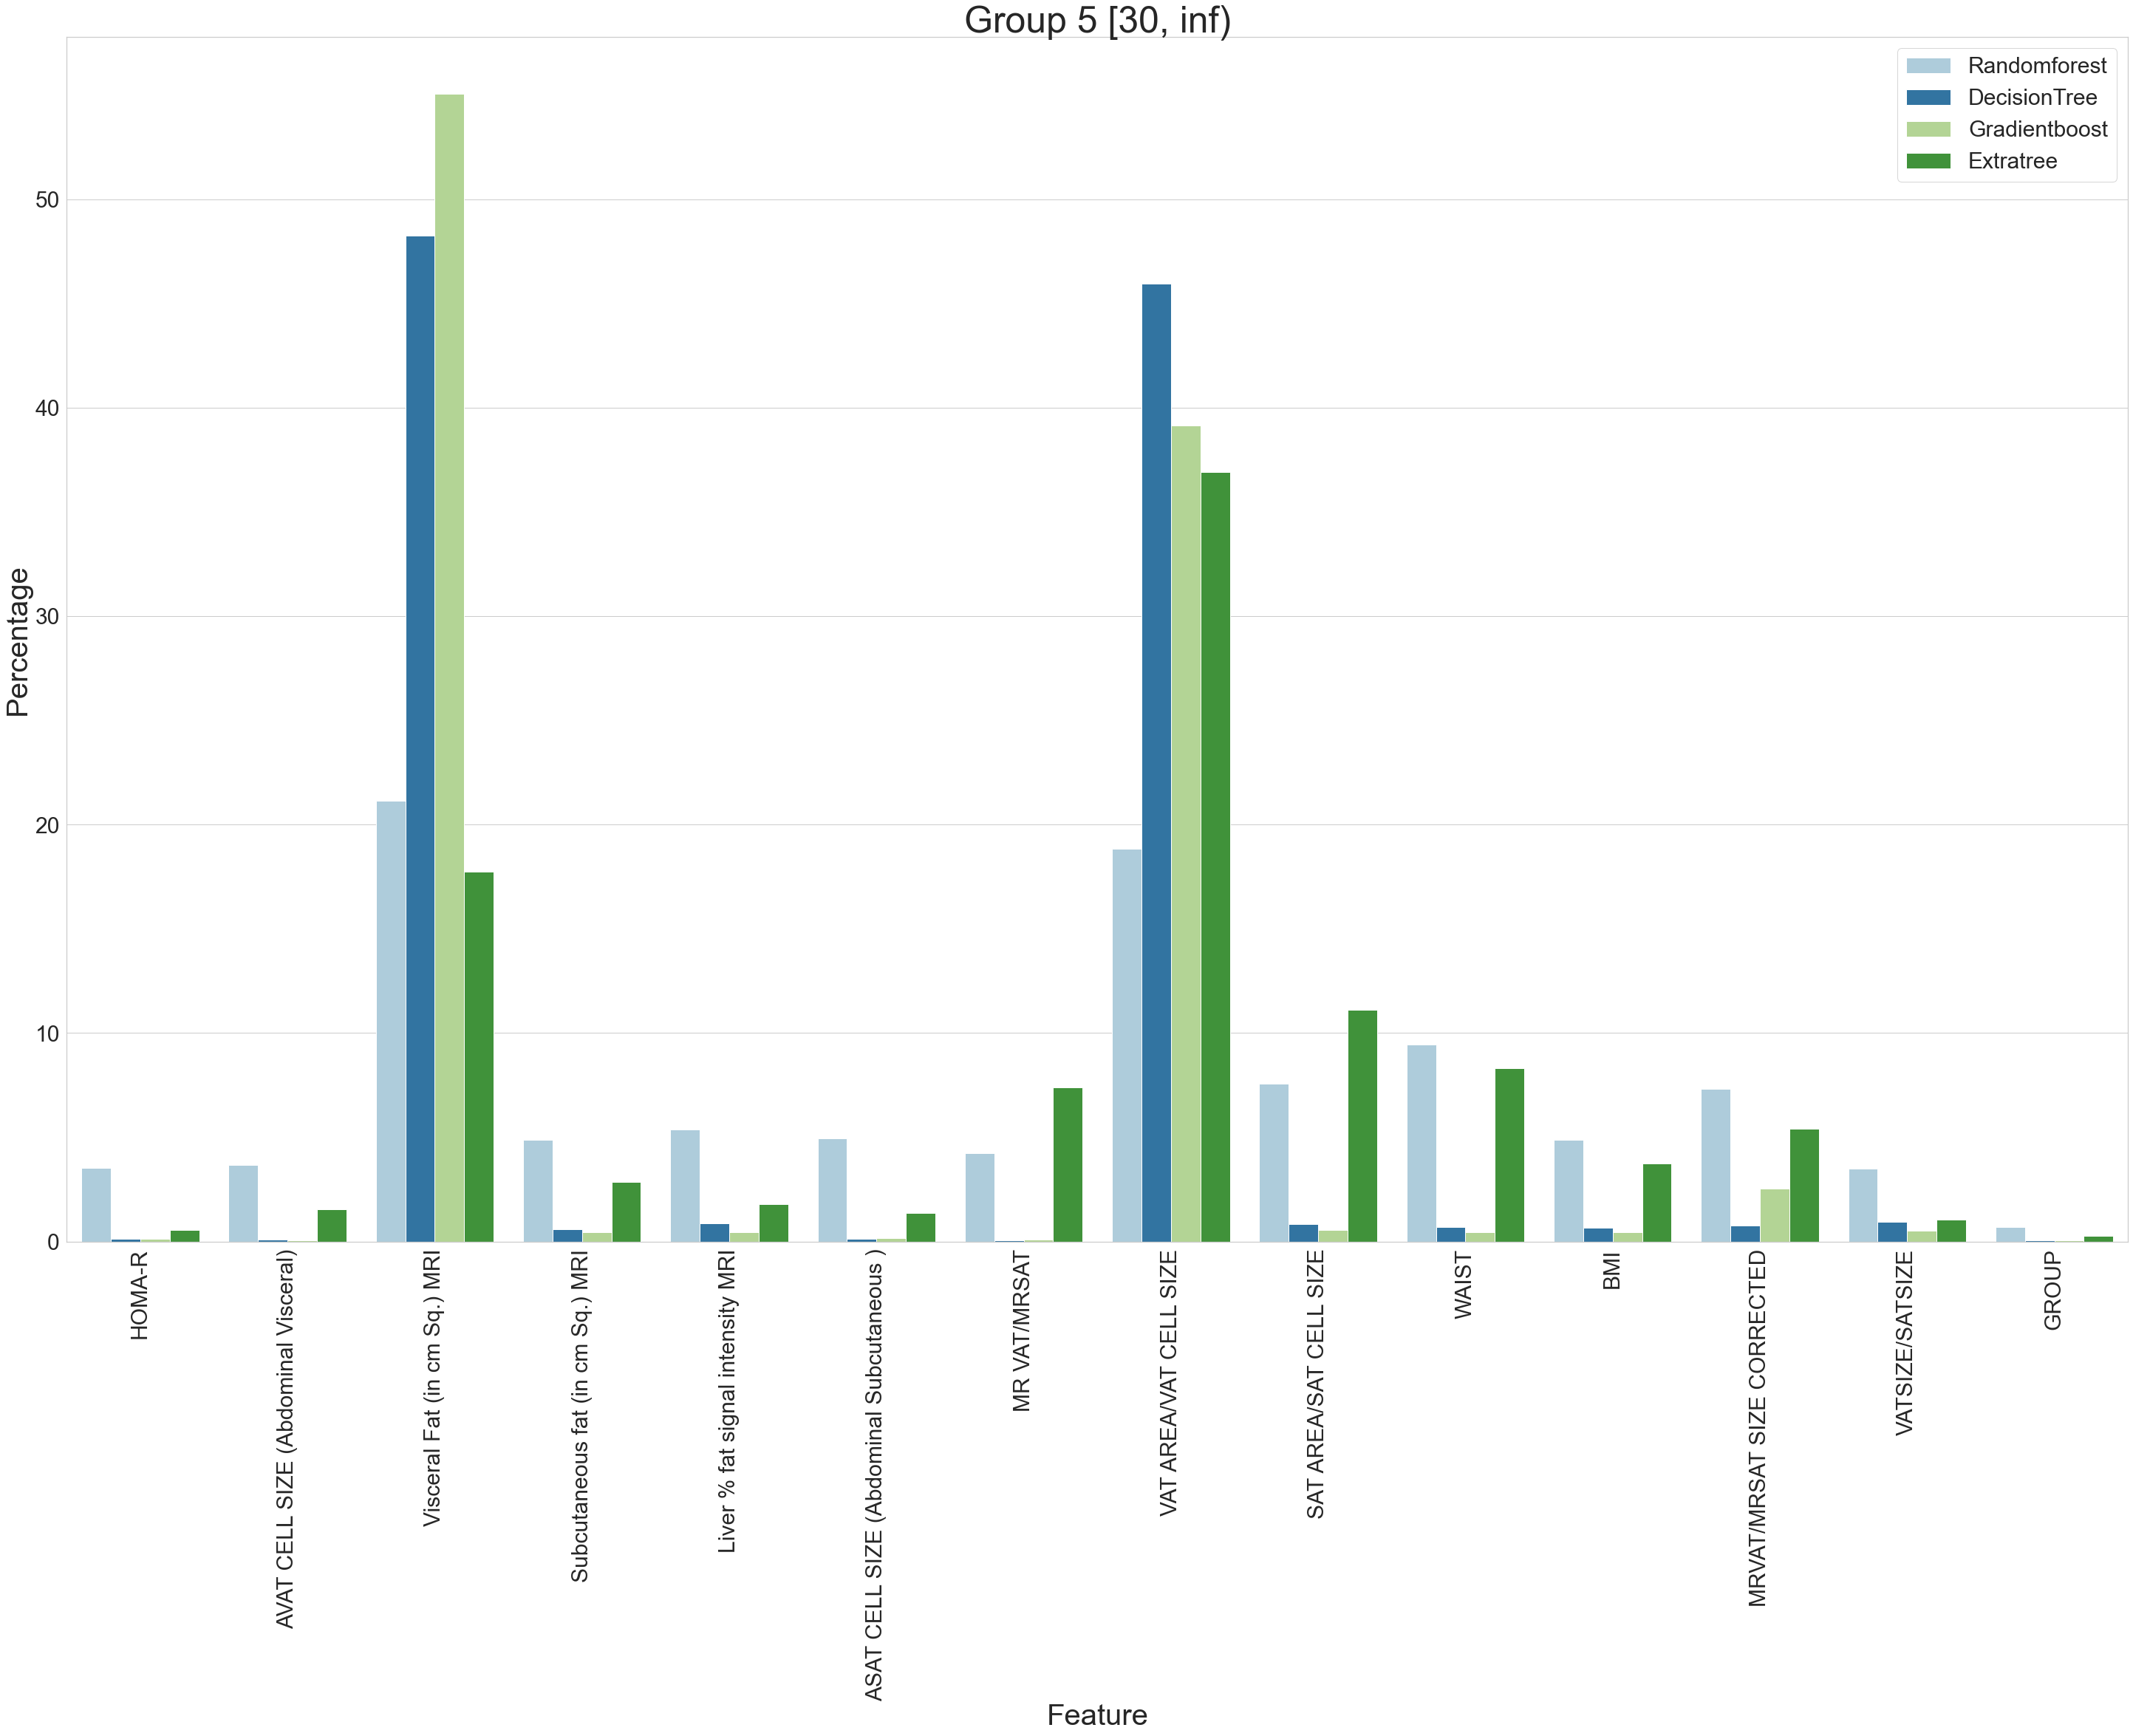

In [23]:
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import *
import matplotlib.pyplot as plt

Feature = ['HOMA-R'
,'AVAT CELL SIZE (Abdominal Visceral)'
,'Visceral Fat (in cm Sq.) MRI'
,'Subcutaneous fat (in cm Sq.) MRI'
,'Liver % fat signal intensity MRI'
,'ASAT CELL SIZE (Abdominal Subcutaneous )'
,'MR VAT/MRSAT'
,'VAT AREA/VAT CELL SIZE'
,'SAT AREA/SAT CELL SIZE'
,'WAIST'
,'BMI'
,'MRVAT/MRSAT SIZE CORRECTED'
,'VATSIZE/SATSIZE'
,'GROUP']*6

#Percentage array have Feature importance values of all four regressors
k = 0
Algorithm = ['Randomforest','DecisionTree','Gradientboost','Extratree']
#Printing all feature importance values
for i in range(0,4*14):
    if(i%14 == 0):
        print("\n")
        print(Algorithm[k])
        k = k+1
    print(Percentage[i], end = ",")
    
Algorithm = list(itertools.chain(*(itertools.repeat(i,14) for i in Algorithm)))
df = pd.DataFrame(list(zip(Percentage, Algorithm, Feature)), columns = ['Percentage', 'Algorithm', 'Feature'])

plt.subplots(figsize=(50, 30))
plt.xlabel('x', fontsize=40)
plt.ylabel('y', fontsize=40)
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Feature", y="Percentage", hue="Algorithm", data=df, palette="Paired")
ax.tick_params(labelsize=30)
ax.axes.set_title("Group 5 [30, inf)",fontsize=50)
ax.legend(fontsize = 30)